### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('twitter.data',header = None)

In [4]:
new_col = ["NCD","AI","AS(NA)","BL","NAC","AS(NAC)","CS","AT","NA","ADL","NAD"]
for i in range(len(data.columns)):
    if i < 7:
        data=data.rename(columns = {i:new_col[0] + '_'+ str(i)})
    elif i >= 7 and i < 14:
        data=data.rename(columns = {i:new_col[1] + '_'+ str(i-7)})
    elif i >= 14 and i < 21:
        data=data.rename(columns = {i:new_col[2] + '_'+ str(i-14)})
    elif i >= 21 and i < 28:
        data=data.rename(columns = {i:new_col[3] + '_'+ str(i-21)})
    elif i >= 28 and i < 35:
        data=data.rename(columns = {i:new_col[4] + '_'+ str(i-28)})
    elif i >= 35 and i < 42:
        data=data.rename(columns = {i:new_col[5] + '_'+ str(i-35)})
    elif i >= 42 and i < 49:
        data=data.rename(columns = {i:new_col[6] + '_'+ str(i-42)})
    elif i >= 49 and i < 56:
        data=data.rename(columns = {i:new_col[7] + '_'+ str(i-49)})
    elif i >= 56 and i < 63:
        data=data.rename(columns = {i:new_col[8] + '_'+ str(i-56)})
    elif i >= 63 and i < 70:
        data=data.rename(columns = {i:new_col[9] + '_'+ str(i-63)})
    elif i >= 70 and i < 77:
        data=data.rename(columns = {i:new_col[10] + '_'+ str(i-70)})
    else:
        data = data.rename(columns= {i:'Target'})

In [5]:
x = data.iloc[:10000, :-1]
y = data.iloc[:10000, -1]

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:
X_train_org, X_test_org, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Linear regression with normal equation

In [9]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
lreg = LinearRegression()

scaler = MinMaxScaler()

X = scaler.fit_transform(x)

In [45]:
scores = cross_val_score(lreg, X, y, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.9055951  0.65032132 0.97805083 0.89968247 0.61746957]


In [46]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.81


In [47]:
lreg.fit(X_train, y_train)
test_score = lreg.score(X_test,y_test) 
test_score

0.899297682044642

# SGD Regressor

In [10]:
param_grid = {'max_iter': [10, 100, 1000],'learning_rate':['optimal'], 'penalty' :['l1','l2'],'random_state':[0]}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
grid_search = GridSearchCV(SGDRegressor(), param_grid, cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)

Parameter grid:
{'max_iter': [10, 100, 1000], 'penalty': ['l1', 'l2'], 'learning_rate': ['optimal'], 'random_state': [0]}


GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_iter': [10, 100, 1000], 'penalty': ['l1', 'l2'], 'learning_rate': ['optimal'], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [11]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 'optimal', 'penalty': 'l2', 'max_iter': 1000, 'random_state': 0}
Best cross-validation score: -204295851.19


# Polynomial

In [ ]:
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression


#X_train_1 = X_train[:,5].reshape(-1,1)
#plt.scatter(X_train_1,y_train)

train_score_list = []
test_score_list = []

for n in range(2,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg = LinearRegression()
    scores1 = cross_val_score(lreg, X_train_poly, y_train, cv=5)
    train_score_list.append(scores1.mean())
    lreg.fit(X_train_poly,y_train)
    scores_2 = lreg.score(X_test_poly,y_test)
    test_score_list.append(scores_2)

print(train_score_list)
print(test_score_list)

[0.9871500755271557, 0.9988129937719591]
[0.8992976820446542, -690.3307223994613]


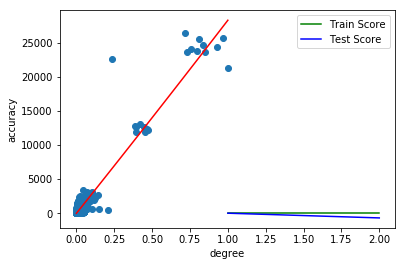

In [18]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

poly = PolynomialFeatures(n)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = X_train[:,5].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

# Ridge

In [14]:
from  sklearn.linear_model import Ridge
ridge = Ridge()

from sklearn.model_selection import GridSearchCV

param_grid = { 'alpha' : [0.01, 0.1, 1, 10, 100]}
        
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)

Parameter grid:
{'alpha': [0.01, 0.1, 1, 10, 100]}


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [15]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.97


In [16]:
grid_search.score(X_test,y_test)

0.8901353327700927

In [17]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('ridge', grid_search)])

In [18]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('ridge', GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0))])

In [19]:
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.89


# lasso

In [22]:
from  sklearn.linear_model import Lasso
lasso = Lasso()

from sklearn.model_selection import GridSearchCV

param_grid = { 'alpha' : [0.01, 0.1, 1, 10, 100]}
        
print("Parameter grid:\n{}".format(param_grid))

grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True)

grid_search_lasso.fit(X_train, y_train)

Parameter grid:
{'alpha': [0.01, 0.1, 1, 10, 100]}


c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: 

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [24]:
print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lasso.best_score_))

Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.97


In [25]:
grid_search_lasso.score(X_test,y_test)

0.8972158514127733

In [27]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('lasso', grid_search_lasso)])

In [28]:
pipe.fit(X_train, y_train)

c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: 

Pipeline(memory=None,
     steps=[('lasso', GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0))])

In [29]:
print("Test score : {:.2f}".format(pipe.score(X_test, y_test)))

Test score : 0.90


# SVR

In [36]:
from sklearn.svm import SVR
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(x, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVR(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the validation set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVR(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 5625   size of validation set: 1875   size of test set: 2500

Best score on validation set: 0.00
Best parameters:  {'C': 100, 'gamma': 0.001}
Test set score with best parameters: 0.01


In [37]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
grid_search = GridSearchCV(SVR(), param_grid, cv=5, return_train_score=True)

In [41]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [ ]:
grid_search.score(X_test,y_test)

# KNN regressor